# Part 01 : Fraud Detection Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset 
path = 'creditcard_sampledata.csv'
df = pd.read_csv(path)

In [4]:
#exploring the data 
df.shape

(8000, 32)

In [5]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,-0.541957,0.237212,-0.218130,0.197437,-0.147850,-0.097830,-0.510053,-0.070939,0.355171,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,-0.196290,0.632955,0.374025,-0.531597,-0.615063,-0.518078,0.003881,-1.288954,-0.797804,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,0.073787,-0.142024,-0.739457,0.502639,0.736688,0.256745,-0.093732,-1.011416,-1.465500,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,-0.746625,1.563459,0.890132,-0.985159,0.778734,1.016974,-0.429490,-0.335787,0.614690,0.703133,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,0.078021,-0.592495,0.997941,1.109328,0.060048,0.086141,-1.149893,0.765198,-0.810589,0.737550,-0.093614,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [6]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [7]:
#Removing the "Unnamed:0" column 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

0    7983
1      17
Name: Class, dtype: int64


In [10]:
# Print the ratio of fraud cases
print(occ / df.shape[0])

0    0.997875
1    0.002125
Name: Class, dtype: float64


**Addressing the Challenge of Imbalanced Data**

In [12]:
# Define the function 'prep_data' to separate the dataset into features (X) and the target variable (y)
def prep_data(df, target_var):
    X = df.drop(columns=[target_var]) 
    y = df[target_var]
    return X, y

In [20]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.show()



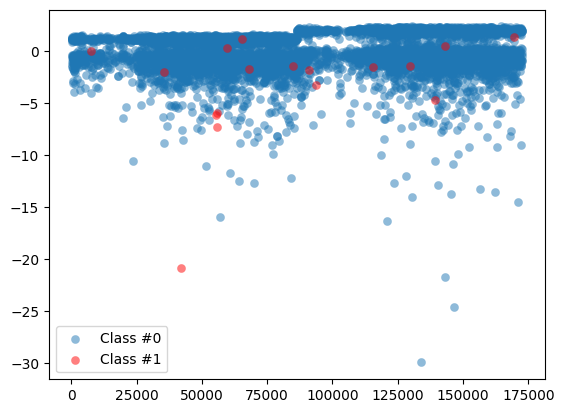

(8000, 31)

In [21]:
# Create X and y from the prep_data function 
X, y = prep_data(df , 'Class')

# Convert y to a numpy array
y =  y.to_numpy() 

# Plot our data by running our plot data function on X and y
plot_data(X, y)


**We'll address the problem of imbalanced data using the Oversampling SMOTE method. This ensures the creation of new samples rather than duplicating existing ones, as SMOTE generates new instances based on the concept of k-nearest neighbors.**

In [22]:
from imblearn.over_sampling import SMOTE

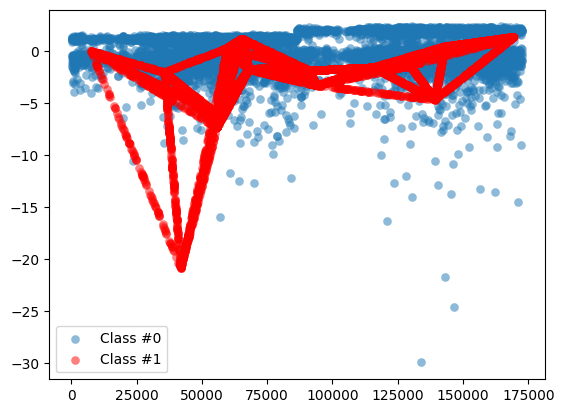

In [23]:
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

In [24]:
X_resampled.shape

(15966, 30)

**Comparing the Results of Oversampling with the Original Data**

In [26]:
#Define the compare_plot function 

def compare_plot(X, y, X_resampled, y_resampled, method='SMOTE'):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], label="Class #0 Original", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], label="Class #1 Original", alpha=0.5, linewidth=0.15, c='r')
    plt.title("Original Data")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0].iloc[:, 0], X_resampled[y_resampled == 0].iloc[:, 1], label="Class #0 Resampled", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1].iloc[:, 0], X_resampled[y_resampled == 1].iloc[:, 1], label="Class #1 Resampled", alpha=0.5, linewidth=0.15, c='r')
    plt.title(f"Resampled Data using {method}")
    plt.legend()

    plt.tight_layout()
    plt.show()


0    7983
1      17
dtype: int64
0    7983
1    7983
dtype: int64


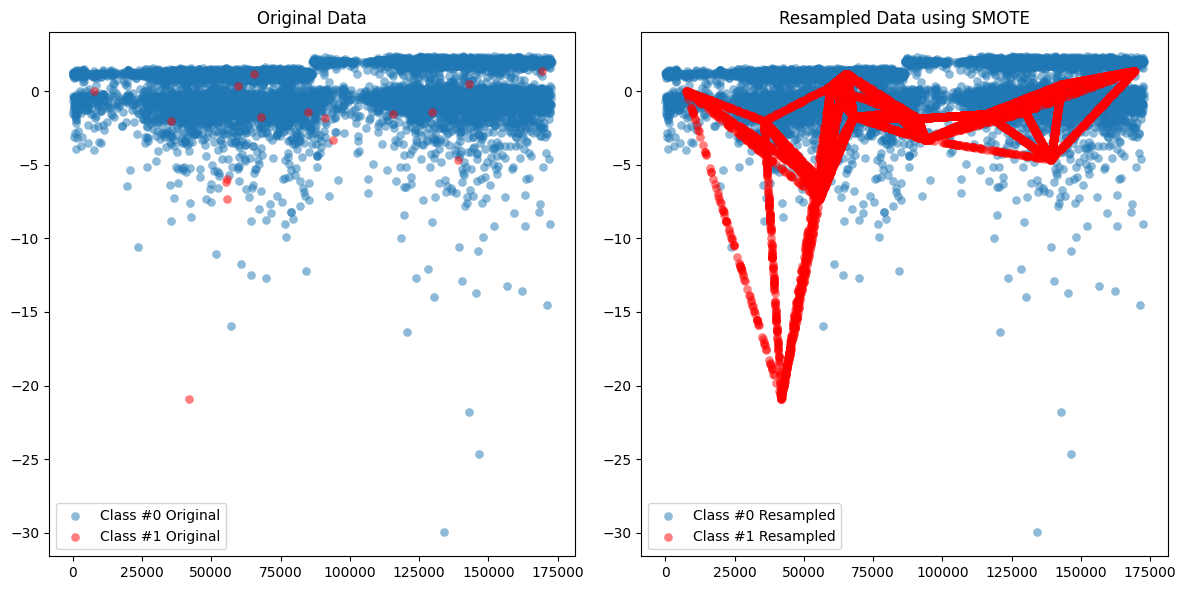

In [27]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

**Using ML Classification to Catch Fraud**

**Case 01 : Using original data**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2390
           1       0.67      0.40      0.50        10

    accuracy                           1.00      2400
   macro avg       0.83      0.70      0.75      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2388    2]
 [   6    4]]


**Case 02 : combining logistic regression with SMOTE**

In [30]:
# we'll be using pipeline
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state =0)

# Fit the pipeline onto the training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2390
           1       0.11      0.70      0.18        10

    accuracy                           0.97      2400
   macro avg       0.55      0.84      0.59      2400
weighted avg       0.99      0.97      0.98      2400

Confusion matrix:
 [[2331   59]
 [   3    7]]


**the second model has a better recall for class 1, which indicates it is better at correctly identifying positive instances of class 1.**